# 1.Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [ ]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import pandas
import sklearn

In [ ]:
domicilio = pd.read_csv('/content/drive/MyDrive/T4M8G2/DADOS/Dados CSV/domicilio.csv', delimiter=',')

In [ ]:
domicilio

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,V0201,V0202,V0203,V0204,V0205,...,V02162,V02163,V02164,V0217,V0219,V0220,V0221,PESO,PESO_FINAL,V6199
0,11,1103,1,110005400,1,1,1,1,1,10,...,2,1,2,1,NaN,1,1,272.806669,372.984516,1
1,11,1103,1,110005400,2,1,1,1,1,5,...,2,1,2,3,1.0,1,1,272.806669,372.984516,1
2,11,1103,1,110005400,4,1,4,1,1,5,...,2,2,2,1,NaN,1,1,272.806669,372.984516,1
3,11,1103,1,110005400,5,1,4,1,1,7,...,2,2,2,1,NaN,2,1,272.806669,372.984516,1
4,11,1103,1,110005400,6,1,1,1,1,6,...,2,2,2,1,NaN,1,1,272.806669,372.984516,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,53,5306,1,530025746,8,1,1,1,1,4,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57916,53,5306,1,530025746,9,1,1,2,1,10,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57917,53,5306,1,530025746,10,1,1,2,1,9,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57918,53,5306,1,530025746,12,1,1,3,1,13,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1


## 1.3. Substituição dos valores numéricos

Para realizar a análise foi necessário "traduzir" os valores numéricos que estão contidos no dataset acessando o dicionários das categorias disponibilizados.

In [ ]:
domicilio['UF'] = domicilio['UF'].replace({11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17:'Tocantins', 21:'Maranhão', 22:'Piauí', 23:'Ceará', 24:'Rio Grande do Norte', 25:'Paraíba', 26:'Pernambuco', 27:'Alagoas', 28:'Sergipe', 29:'Bahia', 31:'Minas Gerais', 32:'Espírito Santo', 33:"Rio de Janeiro", 35:'São Paulo', 41:'Paraná', 42:'Santa Catarina', 43:'Rio Grande do Sul', 50:'Mato Grosso do Sul', 51:'Mato Grosso', 52: 'Goiás', 53:'Distrito Federal'})

domicilio

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,V0201,V0202,V0203,V0204,V0205,...,V02162,V02163,V02164,V0217,V0219,V0220,V0221,PESO,PESO_FINAL,V6199
0,Rondônia,1103,1,110005400,1,1,1,1,1,10,...,2,1,2,1,NaN,1,1,272.806669,372.984516,1
1,Rondônia,1103,1,110005400,2,1,1,1,1,5,...,2,1,2,3,1.0,1,1,272.806669,372.984516,1
2,Rondônia,1103,1,110005400,4,1,4,1,1,5,...,2,2,2,1,NaN,1,1,272.806669,372.984516,1
3,Rondônia,1103,1,110005400,5,1,4,1,1,7,...,2,2,2,1,NaN,2,1,272.806669,372.984516,1
4,Rondônia,1103,1,110005400,6,1,1,1,1,6,...,2,2,2,1,NaN,1,1,272.806669,372.984516,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,Distrito Federal,5306,1,530025746,8,1,1,1,1,4,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57916,Distrito Federal,5306,1,530025746,9,1,1,2,1,10,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57917,Distrito Federal,5306,1,530025746,10,1,1,2,1,9,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57918,Distrito Federal,5306,1,530025746,12,1,1,3,1,13,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1


In [ ]:
domicilio['TIPO_SITUACAO_REG'] = domicilio['TIPO_SITUACAO_REG'].replace({1: 'Urbano', 2: 'Rural'})

domicilio

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,V0201,V0202,V0203,V0204,V0205,...,V02162,V02163,V02164,V0217,V0219,V0220,V0221,PESO,PESO_FINAL,V6199
0,Rondônia,1103,Urbano,110005400,1,1,1,1,1,10,...,2,1,2,1,NaN,1,1,272.806669,372.984516,1
1,Rondônia,1103,Urbano,110005400,2,1,1,1,1,5,...,2,1,2,3,1.0,1,1,272.806669,372.984516,1
2,Rondônia,1103,Urbano,110005400,4,1,4,1,1,5,...,2,2,2,1,NaN,1,1,272.806669,372.984516,1
3,Rondônia,1103,Urbano,110005400,5,1,4,1,1,7,...,2,2,2,1,NaN,2,1,272.806669,372.984516,1
4,Rondônia,1103,Urbano,110005400,6,1,1,1,1,6,...,2,2,2,1,NaN,1,1,272.806669,372.984516,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,Distrito Federal,5306,Urbano,530025746,8,1,1,1,1,4,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57916,Distrito Federal,5306,Urbano,530025746,9,1,1,2,1,10,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57917,Distrito Federal,5306,Urbano,530025746,10,1,1,2,1,9,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57918,Distrito Federal,5306,Urbano,530025746,12,1,1,3,1,13,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1


In [ ]:
domicilio['V0201'] = domicilio['V0201'].replace({1: 'Casa', 2: 'Apartamento', 3:'Habitação em casa de cômodos, cortiço ou cabeça de porco'})

domicilio

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,V0201,V0202,V0203,V0204,V0205,...,V02162,V02163,V02164,V0217,V0219,V0220,V0221,PESO,PESO_FINAL,V6199
0,Rondônia,1103,Urbano,110005400,1,Casa,1,1,1,10,...,2,1,2,1,NaN,1,1,272.806669,372.984516,1
1,Rondônia,1103,Urbano,110005400,2,Casa,1,1,1,5,...,2,1,2,3,1.0,1,1,272.806669,372.984516,1
2,Rondônia,1103,Urbano,110005400,4,Casa,4,1,1,5,...,2,2,2,1,NaN,1,1,272.806669,372.984516,1
3,Rondônia,1103,Urbano,110005400,5,Casa,4,1,1,7,...,2,2,2,1,NaN,2,1,272.806669,372.984516,1
4,Rondônia,1103,Urbano,110005400,6,Casa,1,1,1,6,...,2,2,2,1,NaN,1,1,272.806669,372.984516,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,Distrito Federal,5306,Urbano,530025746,8,Casa,1,1,1,4,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57916,Distrito Federal,5306,Urbano,530025746,9,Casa,1,2,1,10,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57917,Distrito Federal,5306,Urbano,530025746,10,Casa,1,2,1,9,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1
57918,Distrito Federal,5306,Urbano,530025746,12,Casa,1,3,1,13,...,2,1,2,1,NaN,1,2,506.403820,620.212733,1


In [ ]:
domicilio['V0217'] = domicilio['V0217'].replace({1: 'Próprio de algum morador – já pago', 2: 'Próprio de algum morador – ainda pagando', 3:'Alugado', 4:'Cedido por empregador', 5:'Cedido por familiar', 6:'Cedido de outra forma', 7:'Outra condição'})

domicilio

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,V0201,V0202,V0203,V0204,V0205,...,V02162,V02163,V02164,V0217,V0219,V0220,V0221,PESO,PESO_FINAL,V6199
0,Rondônia,1103,Urbano,110005400,1,Casa,1,1,1,10,...,2,1,2,Próprio de algum morador – já pago,NaN,1,1,272.806669,372.984516,1
1,Rondônia,1103,Urbano,110005400,2,Casa,1,1,1,5,...,2,1,2,Alugado,1.0,1,1,272.806669,372.984516,1
2,Rondônia,1103,Urbano,110005400,4,Casa,4,1,1,5,...,2,2,2,Próprio de algum morador – já pago,NaN,1,1,272.806669,372.984516,1
3,Rondônia,1103,Urbano,110005400,5,Casa,4,1,1,7,...,2,2,2,Próprio de algum morador – já pago,NaN,2,1,272.806669,372.984516,1
4,Rondônia,1103,Urbano,110005400,6,Casa,1,1,1,6,...,2,2,2,Próprio de algum morador – já pago,NaN,1,1,272.806669,372.984516,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,Distrito Federal,5306,Urbano,530025746,8,Casa,1,1,1,4,...,2,1,2,Próprio de algum morador – já pago,NaN,1,2,506.403820,620.212733,1
57916,Distrito Federal,5306,Urbano,530025746,9,Casa,1,2,1,10,...,2,1,2,Próprio de algum morador – já pago,NaN,1,2,506.403820,620.212733,1
57917,Distrito Federal,5306,Urbano,530025746,10,Casa,1,2,1,9,...,2,1,2,Próprio de algum morador – já pago,NaN,1,2,506.403820,620.212733,1
57918,Distrito Federal,5306,Urbano,530025746,12,Casa,1,3,1,13,...,2,1,2,Próprio de algum morador – já pago,NaN,1,2,506.403820,620.212733,1


In [ ]:
domicilio['V6199'] = domicilio['V6199'].replace({1: 'Segurança', 2: 'Insegurança leve', 3:'Insegurança moderada', 4:'Insegurança grave'})

domicilio

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,V0201,V0202,V0203,V0204,V0205,...,V02162,V02163,V02164,V0217,V0219,V0220,V0221,PESO,PESO_FINAL,V6199
0,Rondônia,1103,Urbano,110005400,1,Casa,1,1,1,10,...,2,1,2,Próprio de algum morador – já pago,NaN,1,1,272.806669,372.984516,Segurança
1,Rondônia,1103,Urbano,110005400,2,Casa,1,1,1,5,...,2,1,2,Alugado,1.0,1,1,272.806669,372.984516,Segurança
2,Rondônia,1103,Urbano,110005400,4,Casa,4,1,1,5,...,2,2,2,Próprio de algum morador – já pago,NaN,1,1,272.806669,372.984516,Segurança
3,Rondônia,1103,Urbano,110005400,5,Casa,4,1,1,7,...,2,2,2,Próprio de algum morador – já pago,NaN,2,1,272.806669,372.984516,Segurança
4,Rondônia,1103,Urbano,110005400,6,Casa,1,1,1,6,...,2,2,2,Próprio de algum morador – já pago,NaN,1,1,272.806669,372.984516,Segurança
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,Distrito Federal,5306,Urbano,530025746,8,Casa,1,1,1,4,...,2,1,2,Próprio de algum morador – já pago,NaN,1,2,506.403820,620.212733,Segurança
57916,Distrito Federal,5306,Urbano,530025746,9,Casa,1,2,1,10,...,2,1,2,Próprio de algum morador – já pago,NaN,1,2,506.403820,620.212733,Segurança
57917,Distrito Federal,5306,Urbano,530025746,10,Casa,1,2,1,9,...,2,1,2,Próprio de algum morador – já pago,NaN,1,2,506.403820,620.212733,Segurança
57918,Distrito Federal,5306,Urbano,530025746,12,Casa,1,3,1,13,...,2,1,2,Próprio de algum morador – já pago,NaN,1,2,506.403820,620.212733,Segurança


## 1.4. Substituição dos valores numéricos

Para realizar a análise foi necessário "traduzir" os valores numéricos que estão contidos no dataset acessando o dicionários das categorias disponibilizados.

In [ ]:
domicilio['V02101'].fillna(0, inplace=True)
domicilio['V02102'].fillna(0, inplace=True)
domicilio['V02103'].fillna(0, inplace=True)
domicilio['V02104'].fillna(0, inplace=True)
domicilio['V02105'].fillna(0, inplace=True)
domicilio['V02113'].fillna(0, inplace=True)
domicilio['V0212'].fillna(0, inplace=True)
domicilio['V0215'].fillna(0, inplace=True)
domicilio['V0219'].fillna(0, inplace=True)

In [ ]:
domicilio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UF                 57920 non-null  object 
 1   ESTRATO_POF        57920 non-null  int64  
 2   TIPO_SITUACAO_REG  57920 non-null  object 
 3   COD_UPA            57920 non-null  int64  
 4   NUM_DOM            57920 non-null  int64  
 5   V0201              57920 non-null  object 
 6   V0202              57920 non-null  int64  
 7   V0203              57920 non-null  int64  
 8   V0204              57920 non-null  int64  
 9   V0205              57920 non-null  int64  
 10  V0206              57920 non-null  int64  
 11  V0207              57920 non-null  int64  
 12  V0208              44187 non-null  float64
 13  V0209              57920 non-null  int64  
 14  V02101             57920 non-null  float64
 15  V02102             57920 non-null  float64
 16  V02103             579

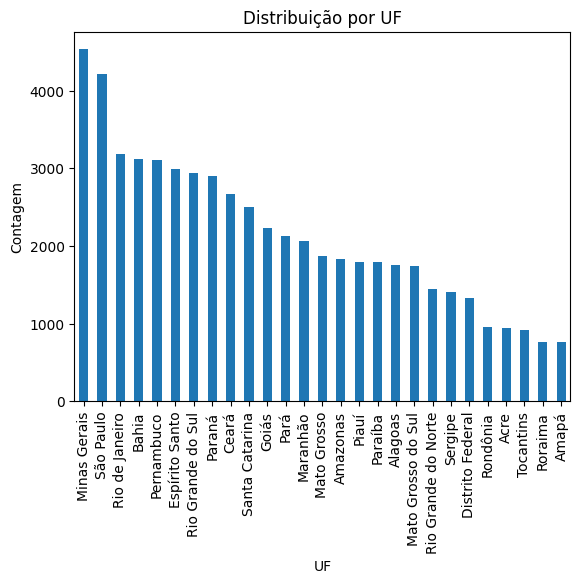

In [ ]:
domicilio['UF'].value_counts().plot(kind='bar')
plt.title("Distribuição por UF")
plt.xlabel("UF")
plt.ylabel("Contagem")
plt.show()

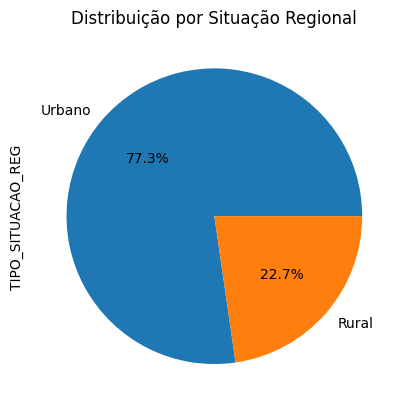

In [ ]:
domicilio['TIPO_SITUACAO_REG'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribuição por Situação Regional")
plt.show()

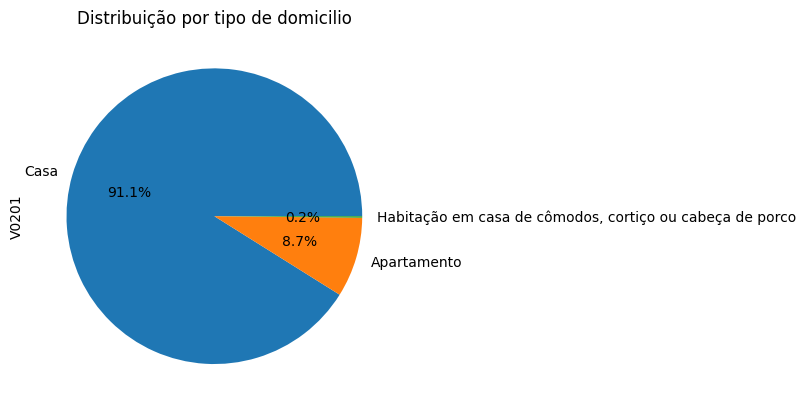

In [ ]:
domicilio['V0201'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribuição por tipo de domicilio")
plt.show()

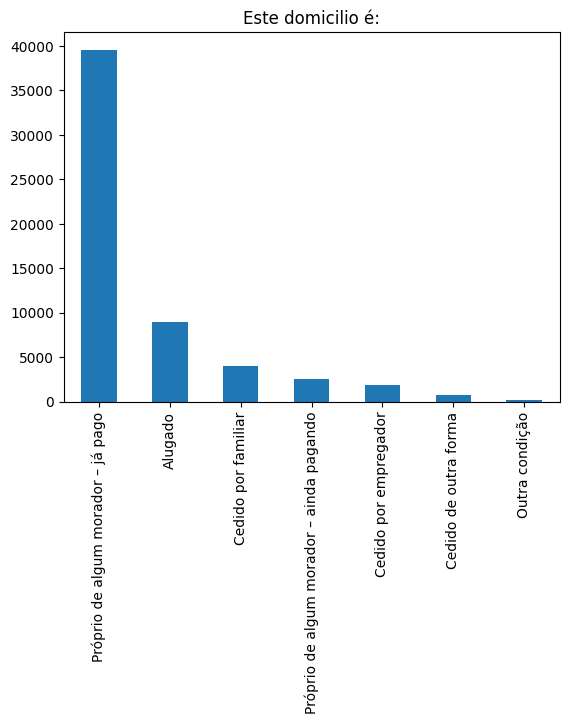

In [ ]:
domicilio['V0217'].value_counts().plot(kind='bar')
plt.title("Este domicilio é:")
plt.show()

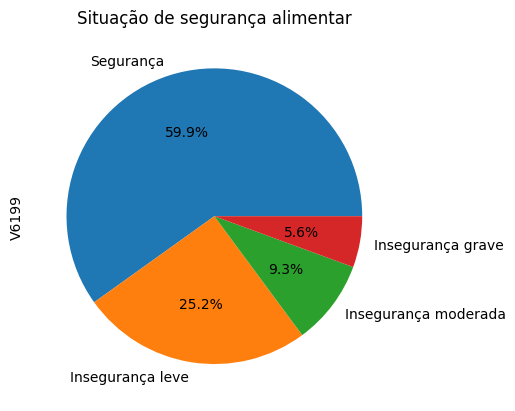

In [ ]:
domicilio['V6199'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Situação de segurança alimentar")
plt.show()